In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
from PIL import Image
import numpy as np
import sys

- Use the following function to combine different ground truth trajectories into a single dataframe. "files" is a list of csv files including those trajectories.Just to recall, how they look like, let's look at "Two Droplet" experiment.

- "combine_track" combines those trajectories into a single file to replicate N-droplet system. We only save the locations and do not consider detection time as a seperate column. Note that this is just a snytetic simulation to test our tracking method.

In [4]:
df = pd.read_csv('ground_truth_trajectories/two_droplet.csv')
df.head()

,frame_id,time,detected,x1,y1,x2,y2,c1,c2
0,1.0,0.000000,1.0,325.578979,163.404694,108.131866,106.876038,0.776071,0.774714
1,2.0,0.033333,1.0,325.575714,163.227097,108.092293,107.678932,0.782519,0.766235
2,3.0,0.066667,1.0,325.667908,163.105774,108.468353,108.557701,0.786945,0.763797
3,4.0,0.100000,1.0,325.768494,162.971680,108.714912,109.482758,0.767718,0.756593
4,5.0,0.133333,1.0,325.843201,162.765045,108.776703,110.480438,0.753717,0.748411


In [5]:
def combine_track(files,save_name='full_track'):

    # Create an empty DataFrame for full_tracks
    full_tracks = pd.DataFrame()

    # Initialize maximum counters for x, y, and c columns
    max_x = max_y = max_c = 0

    # Initialize smallest length
    smallest_length = float('inf')

    temp_index = 0
    # Loop over the files
    for file in files:
        # Read each csv file as a pandas DataFrame
        df = pd.read_csv(f"ground_truth_trajectories/{file}")

         # Convert 'detected' column to numerical type and remove rows with missing 'detected' values
        df['detected'] = pd.to_numeric(df['detected'], errors='coerce')
        df = df.dropna(subset=['detected'])


        # Filter the data to include only the rows where 'detected' is 1
        df = df[df['detected'] == 1]

        # Exclude unwanted columns
        cols_to_exclude = ['frame_id', 'time', 'detected'] + [col for col in df.columns if 'c' in col]
        df = df[[col for col in df.columns if col not in cols_to_exclude]]

        # Find the maximum indices of x, y, and c columns in the current DataFrame
        x_cols = [col for col in df.columns if 'x' in col]
        y_cols = [col for col in df.columns if 'y' in col]


        num_particle = int(x_cols[-1][-1])
        temp_index += num_particle
        #start_index, end_index
        temp_list = [temp_index-num_particle+1,temp_index]

        #new column names
        new_x_cols = [f"x{i}" for i in range(temp_list[0],temp_list[1]+1)]
        new_y_cols = [f"y{i}" for i in range(temp_list[0],temp_list[1]+1)]


        rename_x_dict = dict(zip(x_cols, new_x_cols))
        rename_y_dict = dict(zip(y_cols, new_y_cols))


        #merge all dictionaries into one
        rename_dict = {**rename_x_dict, **rename_y_dict}

        #use this dictionary to rename the columns
        df.rename(columns=rename_dict, inplace=True)

            # Update smallest length
        smallest_length = min(smallest_length, len(df))

        # Merge the df DataFrame with the full_tracks DataFrame
        full_tracks = pd.concat([full_tracks, df], axis=1)



    # Truncate the final dataframe to the smallest length
    full_tracks = full_tracks.iloc[:smallest_length]

    # Remove rows with any empty (NaN) values
    full_tracks.dropna(how='any', inplace=True)

    # # Save the full_tracks DataFrame to a csv file
    full_tracks.to_csv(f'{save_name}.csv', index=False)
    
    print(f'results saved to {save_name}.csv!')
    
# # List of csv files
# files = ['res_low.csv', 'three_droplet.csv', 'control.csv', 'corral_white.csv', 'two_droplet.csv', 'res_mid.csv', 'lights_high.csv', 
#          'faraday.csv', 'lights_off.csv', 'lights_low.csv']

files = ['three_droplet.csv', 'two_droplet.csv', 'res_mid.csv', 'lights_high.csv','control.csv','res_low.csv','lights_off.csv']
combine_track(files,save_name='ten_droplet')

results saved to ten_droplet.csv!


In [6]:
# Read the full_tracks.csv file
full_tracks = pd.read_csv('ten_droplet.csv')
full_tracks.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10
0,268.061493,111.302551,166.149506,119.649284,152.640900,127.806129,325.578979,163.404694,108.131866,106.876038,208.526062,167.716873,64.380684,211.895538,287.938232,107.235840,72.608734,52.107666,320.396057,209.317993
1,269.447937,111.732948,165.363419,119.126038,151.049683,127.165916,325.575714,163.227097,108.092293,107.678932,207.771484,168.189743,64.825012,213.620224,287.888245,108.778572,72.214432,51.845062,321.450134,210.598175
2,270.892822,112.271484,164.523834,118.594818,149.568451,126.583847,325.667908,163.105774,108.468353,108.557701,207.319672,169.035522,64.793198,215.567749,288.255829,110.153778,71.386047,51.810928,321.954865,211.293335
3,272.338379,112.882950,163.703583,118.048950,148.182419,126.022186,325.768494,162.971680,108.714912,109.482758,206.310516,169.394318,65.271698,217.288971,288.355286,111.719574,71.049240,51.649143,322.502136,212.235931
4,273.884705,113.294998,162.849823,117.581146,147.134995,125.435860,325.843201,162.765045,108.776703,110.480438,205.733215,169.793884,65.773293,219.311615,288.429199,113.205696,70.483521,51.495316,323.070923,212.969482


- Following procedure creates a droplet simulation using "full_tracks" above and save it as a video file with 30 fps.There are several paramaters you can play such as *particle_radius*,  *distance_factor* etc. We calculate pair-wise forces to update the position of the particles along with a simple collision avoidance. 

Creating Animation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7282/7282 [02:15<00:00, 53.81it/s]


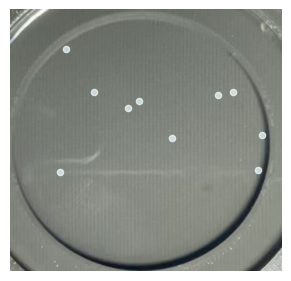

In [6]:
# Determine the number of frames based on the number of rows in the DataFrame
num_frames = len(full_tracks)

# Find the maximum x and y values in the full_tracks DataFrame
max_x = int(full_tracks[[col for col in full_tracks.columns if 'x' in col]].max().max())
max_y = int(full_tracks[[col for col in full_tracks.columns if 'y' in col]].max().max())

# Load the custom image as the background
background_img = Image.open('base_canvas.jpg')
# Resize the background image
background_img = background_img.resize((max_x, max_y))

# Set up the figure and axes with the size of the background image
fig, ax = plt.subplots(figsize=(max_x / 100, max_y / 100))
ax.set_aspect('equal')
ax.set_xlim(0, max_x)  # Set the x-axis limit based on the particle width
ax.set_ylim(max_y, 0)  # Set the y-axis limit based on the particle height and invert the y-axis

# Remove axis lines and ticks
ax.axis('off')

# Display the background image
ax.imshow(background_img, extent=[0, max_x, 0, max_y], aspect='auto')

# Create a scatter plot to represent the particles, I picked '#f2ffff' as a droplet color.
scatter = ax.scatter([], [], s=20, c='#f2ffff', alpha=0.7)

# Define particle properties
num_particles = len(full_tracks.columns) // 2  # Assuming each particle has (x, y) columns
particle_radius = 4
particle_mass = 1

# Initialize particle positions and velocities
particle_positions = full_tracks.iloc[0].values.reshape(-1, 2)
particle_velocities = np.zeros_like(particle_positions)

# Define time step and gravitational constant
dt = 0.1
G = 1  # Gravitational constant (you can adjust this value)

# Flag to indicate termination signal
termination_signal = False


# Update function to animate the scatter plot
def update(frame):
    global particle_positions, particle_velocities, termination_signal

    # Check for termination signal
    if termination_signal:
        sys.exit("Simulation terminated.")
    
    # Get the particle positions for the current frame
    particle_positions = full_tracks.iloc[frame].values.reshape(-1, 2)

    # Perform collision detection and avoidance
    particle_positions = avoid_collisions(particle_positions,particle_velocities)

    # Calculate the gravitational forces acting on each particle
    forces = calculate_gravitational_forces(particle_positions)

    # Update particle velocities and positions
    particle_velocities += forces * dt / particle_mass
    particle_positions += particle_velocities * dt

    # Update the scatter plot data
    scatter.set_offsets(particle_positions)


# Animation function
def animate(frame):
    update(frame)


def avoid_collisions(particle_positions,particle_velocities,distance_factor=3):
    # Iterate over each particle
    for i in range(num_particles):
        x1, y1 = particle_positions[i]

        # Check for collisions with other particles
        for j in range(i + 1, num_particles):
            x2, y2 = particle_positions[j]

            # Calculate the distance between the particles
            distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

            # Calculate the relative motion of particles
            dx = x2 - x1
            dy = y2 - y1
            relative_velocity = particle_velocities[j] - particle_velocities[i]

            # Check if particles are getting closer to each other
            if np.dot([dx, dy], relative_velocity) < 0:
                # If particles are getting closer, adjust their positions and apply repulsion force
                if distance < distance_factor * particle_radius:
                    overlap = 2 * particle_radius - distance

                    # Calculate the direction of separation
                    direction = np.array([dx, dy]) / distance

                    # Update the positions to avoid overlap
                    particle_positions[i] -= overlap * direction / 2
                    particle_positions[j] += overlap * direction / 2

                    # Apply repulsion force
                    repulsion_force = 0.1 * overlap  # Adjust the repulsion strength as needed
                    particle_positions[i] -= repulsion_force * direction
                    particle_positions[j] += repulsion_force * direction

    return particle_positions





# Calculate gravitational forces between particles
def calculate_gravitational_forces(particle_positions):
    forces = np.zeros_like(particle_positions)

    for i in range(num_particles):
        for j in range(num_particles):
            if i != j:
                dx = particle_positions[j, 0] - particle_positions[i, 0]
                dy = particle_positions[j, 1] - particle_positions[i, 1]
                distance = np.sqrt(dx ** 2 + dy ** 2)

                # Calculate the gravitational force
                force = G * particle_mass ** 2 / distance ** 2

                # Decompose the force into x and y components
                fx = force * dx / distance
                fy = force * dy / distance

                # Add the force to the total forces
                forces[i] += np.array([fx, fy])

    return forces


# Define the progress bar
progress_bar = tqdm(total=num_frames, desc='Creating Animation')


# Callback function to update the progress bar
def progress_callback(frame, total_frames):
    progress_bar.update()


try:
    # Create the animation
    ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=33.33)  # 33.33 ms = 30 fps

    # Set up the writer for the animation
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

    # Save the animation as an mp4 file
    ani.save('droplet_animation.mp4', writer=writer, progress_callback=progress_callback)

except Exception as e:
    # Catch the exception and check for termination signal
    if str(e) == "q":
        termination_signal = True
        print("Simulation terminated.")
    else:
        raise e
finally:
    # Close the progress bar
    progress_bar.close()


- Once we have the video "droplet_animation.mp4", we can follow the usual procedure to track individual droplets outlined in the tutorial. 

- We have annotated two different datasets with 7-droplet and 10-droplet that can be found in "datasets" folder.